<a href="https://colab.research.google.com/github/Gaurav-phatkare/Driver-Distraction-Drowsiness-Detection-System-using-deep-learning/blob/main/Training_Files/MobileanetModelDrowsinessDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

In [ ]:
!unzip "/content/drive/MyDrive/Driver Distraction & Drowsiness detection Using Tensorflow/Driver Drowsiness Detection/Dataset/abcd.zip" -d "/content/EyeData"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

def print_directory_structure(directory, indent=0):
    for item in os.listdir(directory):
        path = os.path.join(directory, item)
        if os.path.isdir(path):
            print(f"{'    ' * indent}{os.path.basename(path)} - {len(os.listdir(path))} files")
            print_directory_structure(path, indent + 1)

eye_directory = '/content/Eyes_Dataset_v03'

print_directory_structure(eye_directory)

validation_dataset - 2 files
    open_eye - 8586 files
    closed_eye - 8376 files
training_dataset - 2 files
    open_eye - 32169 files
    closed_eye - 31492 files
test_dataset - 2 files
    open_eye - 2197 files
    closed_eye - 2078 files


In [7]:
eye_directory = '/content/Eyes_Dataset_v03'

files = 0
for _, _, filenames in os.walk(eye_directory):
  files += len(filenames)



print(f"Total images in dataset : {files}")

Total images in dataset : 84898


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
# from keras.layers.normalization import BatchNormalization
from keras import optimizers
import cv2

IMG_SIZE  = 64

In [ ]:
## Getting all the images

train_image = []
train_image_label = []

cls = ["closed_eye", "open_eye"]
for i in range(2):
    print('now we are in the folder ',cls[i])
    filePath = "/content/Eyes_Dataset_v03/training_dataset/"+f"{cls[i]}/"
    imgs = os.listdir(filePath)
    for j in range(len(imgs)):
        print(imgs[j])
    #for j in range(100):
        img_name = filePath+imgs[j]
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        # img = img[50:,120:-50]
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        label = i
        train_image.append([img,label])
        train_image_label.append(i)

In [11]:
len(train_image), len(train_image_label)

(63661, 63661)

In [12]:
import random
random.shuffle(train_image)

In [ ]:
## Getting all validation images

val_image = []
val_image_label = []

cls = ["closed_eye", "open_eye"]
for i in range(2):
    print('now we are in the folder ',cls[i])
    filePath = "/content/Eyes_Dataset_v03/validation_dataset/"+f"{cls[i]}/"
    imgs = os.listdir(filePath)
    for j in range(len(imgs)):
        print(imgs[j])
    #for j in range(100):
        img_name = filePath+imgs[j]
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        # img = img[50:,120:-50]
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        label = i
        val_image.append([img,label])
        val_image_label.append(i)

In [14]:
len(val_image), len(val_image_label)

(16962, 16962)

In [15]:
X_train= []
y_train = []
X_val = []
y_val = []


for features,labels in train_image:
  X_train.append(features)
  y_train.append(labels)

for features, labels in val_image:
  X_val.append(features)
  y_val.append(labels)


print (len(X_train),len(X_val))
print (len(y_train),len(y_val))

63661 16962
63661 16962


In [16]:
## Converting images to nparray. Encoding the Y

X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X_val = np.array(X_val).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


print (X_train.shape)

(63661, 64, 64, 3)


In [ ]:



# train_dir = "/content/Eyes_Dataset_v03/training_dataset/"
# train_datagen = ImageDataGenerator()
# train_generator = train_datagen.flow_from_directory( train_dir,
#                                                      target_size=(IMG_SIZE,IMG_SIZE),
#                                                      batch_size=32,
#                                                      shuffle=True,
#                                                      class_mode='categorical'
#                                                      )


# val_dir = "/content/Eyes_Dataset_v03/validation_dataset/"
# validation_datagen = ImageDataGenerator(validation_split=0.2)

# validation_generator =  validation_datagen.flow_from_directory( val_dir,
#                                                                 target_size=(IMG_SIZE,IMG_SIZE),
#                                                                 batch_size=32,
#                                                                 class_mode='categorical'
#                                                                 )

In [19]:
import os
import random
import numpy as np
import pandas as pd
from skimage import io
from skimage import color
from PIL import Image
import PIL.Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from keras import backend as K
# from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
# from IPython.display import Image


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
# from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras import optimizers

In [24]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 

In [25]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

x = Dropout(0.1)(x) # ****reduce dropout

x=Dense(1024,activation='relu')(x) #dense layer 2

# x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x=Dense(512,activation='relu')(x) #dense layer 3

preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

model = Model(inputs=base_model.input, outputs=preds)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 32)    128 

In [26]:
from keras import optimizers

#adam = optimizers.Adam(lr=0.001) #tried 0.0005 - too slow and didn't converge
sgd = optimizers.SGD(lr = 0.005) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy']) # create object

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('mobilenet_weights_aug_setval_sgd.hdf5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=8, verbose=1)


datagen = ImageDataGenerator(
    horizontal_flip = True
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 32)

# Fits the model on batches with real-time data augmentation:
mobilenet_model = model.fit_generator(data_generator,steps_per_epoch = len(X_train) / 64, callbacks=[checkpointer, earlystopper],
                                                            epochs = 25, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/25
993/994 [============================>.] - ETA: 0s - loss: 0.1301 - accuracy: 0.9497
Epoch 1: val_loss improved from inf to 0.04576, saving model to mobilenet_weights_aug_setval_sgd.hdf5
994/994 [==============================] - 38s 31ms/step - loss: 0.1300 - accuracy: 0.9498 - val_loss: 0.0458 - val_accuracy: 0.9842
Epoch 2/25
995/994 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9790
Epoch 2: val_loss improved from 0.04576 to 0.03932, saving model to mobilenet_weights_aug_setval_sgd.hdf5
994/994 [==============================] - 28s 28ms/step - loss: 0.0587 - accuracy: 0.9790 - val_loss: 0.0393 - val_accuracy: 0.9862
Epoch 3/25
993/994 [============================>.] - ETA: 0s - loss: 0.0428 - accuracy: 0.9843
Epoch 3: val_loss improved from 0.03932 to 0.03629, saving model to mobilenet_weights_aug_setval_sgd.hdf5
994/994 [==============================] - 30s 30ms/step - loss: 0.0427 - accuracy: 0.9844 - val_loss: 0.0363 - val_accuracy: 0.9867

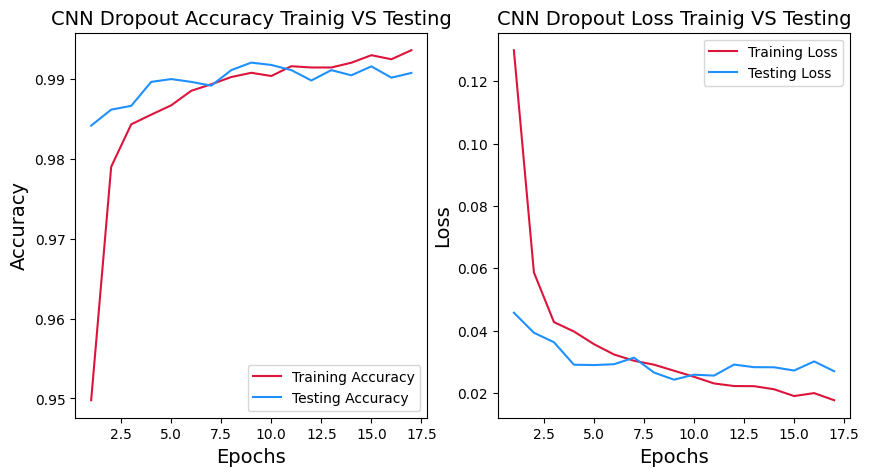

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(model.history.history['accuracy']) + 1), model.history.history['accuracy'], linestyle = 'solid',  color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(model.history.history['val_accuracy']) + 1), model.history.history['val_accuracy'], linestyle = 'solid',  color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Dropout Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(model.history.history['loss']) + 1), model.history.history['loss'], linestyle = 'solid',  color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(model.history.history['val_loss']) + 1), model.history.history['val_loss'], linestyle = 'solid', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

In [30]:
model.save("mobilenet64dist.h5")

---

In [32]:
from tensorflow.keras.models import load_model
mobilenet_model = load_model("/content/mobilenet64dist.h5")

In [33]:
import random
import os
import shutil


source_root_1 = '/content/Eyes_Dataset_v03/test_dataset/closed_eye'
source_root_2 = '/content/Eyes_Dataset_v03/test_dataset/open_eye'


destination_folder = '/content/outputFolder/Input_img'

# Get list of image files from each source folder
source_files_1 = [f for f in os.listdir(source_root_1) if f.endswith(('.jpg', '.png', '.jpeg'))]
source_files_2 = [f for f in os.listdir(source_root_2) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Concatenate the lists
all_source_files = source_files_1 + source_files_2


selected_files = random.sample(all_source_files, 20)

for file in selected_files:

  if os.path.exists(os.path.join(source_root_1, file)):
    source_path = os.path.join(source_root_1, file)
  elif os.path.exists(os.path.join(source_root_2, file)):
    source_path = os.path.join(source_root_2, file)
  else:

    continue

  destination_path = os.path.join(destination_folder, file)
  shutil.copyfile(source_path, destination_path)

print(f'Successfully copied {len(selected_files)} files to {destination_folder}')

Successfully copied 20 files to /content/outputFolder/Input_img


Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19


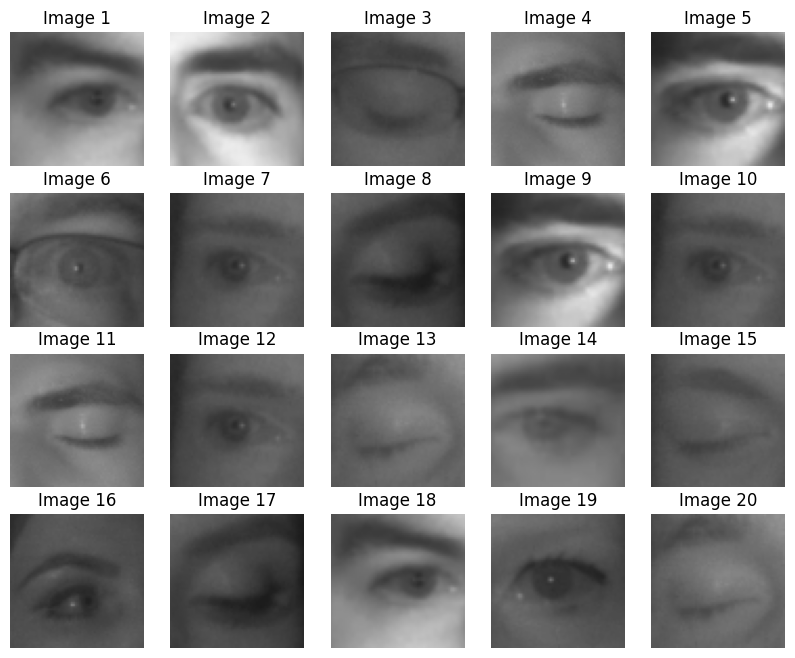

In [44]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

test_image = []
fig, ax = plt.subplots(4, 5, figsize=(10, 8))

files = os.listdir('/content/outputFolder/Input_img')
nums = np.random.randint(low=1, high=len(files), size=20)

for i in range(20):
    row, col = divmod(i, 5)
    print('Image number:', i)
    img = cv2.imread('/content/outputFolder/Input_img/' + files[nums[i]])
    # img = img[50:, 120:-50]
    img = cv2.resize(img, (64, 64))
    test_image.append(img)
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].set_title(f'Image {i+1}')
    ax[row, col].axis('off')  # Optional: Turn off axis labels

plt.show()


In [45]:
test = []

for img in test_image:
    test.append(img)

mobilenet_model.load_weights('/content/mobilenet_weights_aug_setval_sgd.hdf5')


test = np.array(test).reshape(-1,64,64,3)
prediction = mobilenet_model.predict(test)

1/1 [==============================] - 0s 21ms/step


In [46]:
tags = {0:"closed Eyes",
        1 : "open Eyes"}

1/1 [==============================] - 0s 115ms/step


1

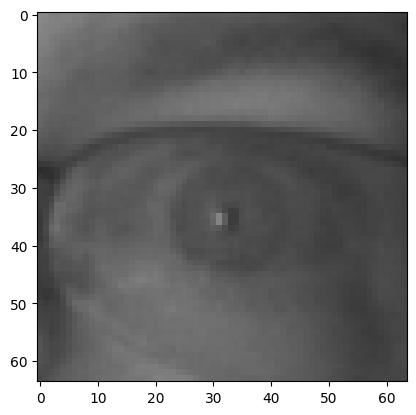

In [43]:
test = test_image[7]
plt.imshow(test)
test = np.array(test).reshape(-1,64,64,3)
prediction = mobilenet_model.predict(test)
np.argmax(prediction)
# np.where(prediction == np.amax(prediction))[1][0]
# predicted_class = 'C'+str(np.where(prediction == np.amax(prediction))[1][0])
# tags[predicted_class]

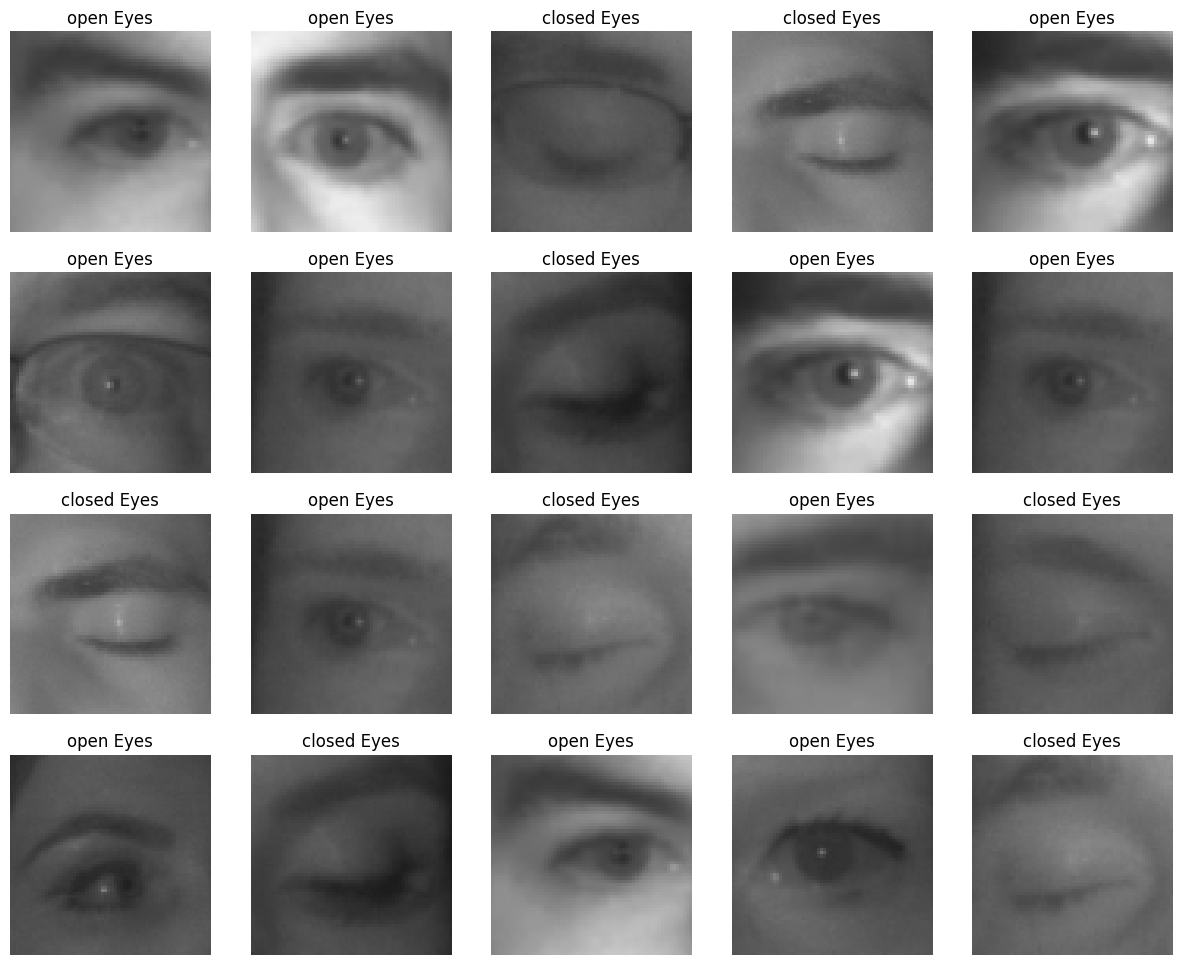

In [47]:
fig, ax = plt.subplots(4, 5, figsize = (15,12))
ax = ax.flatten()

for i in range(20):
    ax[i].imshow(test[i].squeeze())
    # predicted_class = 'C' + str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    predicted_class = np.argmax(prediction[i])
    ax[i].set_title(tags[predicted_class])
    ax[i].axis('off')

# plt.tight_layout()
plt.show()
